# Exploring Relationships in Semantic Models with Semantic Link

In the world of data analytics, understanding the relationships between datasets is crucial for making informed decisions. Semantic Link, a powerful tool unique to Microsoft Fabric, allows users to visualize these relationships seamlessly. In this post, we’ll explore how to leverage Semantic Link to uncover insights from your data and present them effectively in Power BI.

By utilizing Semantic Link, you can uncover and visualize the intricate relationships within your datasets. This notebook serves as a guide to help you leverage these capabilities, enhancing your data analysis and visualization efforts.

Have you tried using Semantic Link in your projects?

## Purpose of the Notebook
This notebook aims to demonstrate how to utilize Semantic Link to view relationships within a Semantic Model. By the end of this guide, you’ll be equipped to visualize these relationships in Power BI.

### Setting Up the Environment
To get started, you’ll need to install the required libraries. This can be done easily with the following command:

In [2]:
%pip install semantic-link

# Once installed, import the necessary modules:
import sempy.fabric as fabric
from sempy.relationships import plot_relationship_metadata
from sempy.relationships import find_relationships
from sempy.fabric import list_relationship_violations
from sempy.dependencies import plot_dependency_metadata

import pandas as pd
import graphviz
import base64
import matplotlib.pyplot as plt

StatementMeta(, 5c846428-91e0-41a7-870f-4d56547611a5, 9, Finished, Available, Finished)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 54.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 130.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 113.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 132.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 194.5 MB/s eta 0:00:00
  Attempting uninstall: semantic-link-sempy
    Found existing installation: semantic-link-sempy 0.7.7
    Not uninstalling semantic-link-sempy at /home/trusted-service-user/cluster-env/trident_env/lib/python3.11/site-packages, outside environment /nfs4/pyenv-

Fetching Semantic Models
Next, let’s retrieve all semantic models in your current workspace. This functionality can also be extended to entire tenants or multiple workspaces using Semantic Link Labs, making it a versatile tool for data exploration.

In [3]:
# Get the list of datasets
datasets = fabric.list_datasets()
dataset_svg_list = []

# Convert the list to a DataFrame
df = pd.DataFrame(datasets, columns=['Dataset Name'])

StatementMeta(, 5c846428-91e0-41a7-870f-4d56547611a5, 11, Finished, Available, Finished)

In [4]:
display(df)

StatementMeta(, 5c846428-91e0-41a7-870f-4d56547611a5, 12, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 7e204306-5a36-49b4-9bd5-1c229c57a507)

In [5]:
# DatasetName='ReleasePlan1'
# relationships = fabric.list_relationships(DatasetName)
# relationships
# fig =plot_relationship_metadata(relationships)
# fig
# print(fig)
# svg_text = fig.pipe(format='svg').decode('utf-8')
# svg_text
# # Extract content between <svg> and </svg>
# start_index = svg_text.find('<svg')
# end_index = svg_text.find('</svg>') + len('</svg>')
# svg_content = svg_text[start_index:end_index]

# print(svg_content)


StatementMeta(, 5c846428-91e0-41a7-870f-4d56547611a5, 13, Finished, Available, Finished)

digraph {
	graph [rankdir=LR]
	node [shape=plaintext]
	fabric_release_plan:Feature_URL -> fabric_release_plan_with_desc:full_url [color=black colorscheme=accent8]
	fabric_release_plan_with_desc [label=<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" ALIGN="LEFT"><TR><TD><B>fabric_release_plan_with_desc</B></TD></TR><TR><TD ALIGN="LEFT" port="full_url">full_url</TD></TR></TABLE>>]
	fabric_release_plan [label=<<TABLE BORDER="0" CELLBORDER="1" CELLSPACING="0" ALIGN="LEFT"><TR><TD><B>fabric_release_plan</B></TD></TR><TR><TD ALIGN="LEFT" port="Feature_URL">Feature_URL</TD></TR></TABLE>>]
}



## Exploring Dataset Relationships

With the datasets in hand, we can iterate through each dataset to list its relationships. We will use **fabric.list_relationships** to get relationships.

    for dataset_name in df['Dataset Name']:
        relationships = fabric.list_relationships(dataset_name)

## Visualizing Relationships

Visual representation of data relationships can significantly enhance comprehension. Using the **plot_relationship_metadata()** function, we can create a diagram that illustrates these connections.

    if not relationships.empty:
        fig = plot_relationship_metadata(relationships)

## Storing Visualizations

To integrate these visualizations into Power BI, we convert them into SVG format. This allows for easy storage and retrieval.

    svg_text = fig.pipe(format='svg').decode('utf-8')

We then create ImageURL with right structure so Power BI can display the Image using Image URL categorization

    df['ImageURL'] = 'data:image/svg+xml;utf8, '+ df['SVGText']



In [6]:
# Iterate over each dataset name
for dataset_name in df['Dataset Name']:
    # Get the relationships of the current dataset
    relationships = fabric.list_relationships(dataset_name)
    if not relationships.empty:
        fig = plot_relationship_metadata(relationships)
        # print(fig)
    # Get the SVG source as a string
        svg_text = fig.pipe(format='svg').decode('utf-8')
        # Extract content between <svg> and </svg>
        start_index = svg_text.find('<svg')
        end_index = svg_text.find('</svg>') + len('</svg>')
        svg_content = svg_text[start_index:end_index]
        # print(svg_content)

        # Append the dataset name and SVG text to the list
        dataset_svg_list.append((dataset_name, svg_content))
        # Convert the list to a DataFrame for better visualization
    df = pd.DataFrame(dataset_svg_list, columns=['DatasetName', 'SVGText'])
df['ImageURL'] = 'data:image/svg+xml;utf8, '+ df['SVGText']
drop_cols = ['SVGText']
df.drop(drop_cols, axis=1, inplace=True)
df = df[['DatasetName', 'ImageURL']]

StatementMeta(, 5c846428-91e0-41a7-870f-4d56547611a5, 14, Finished, Available, Finished)

In [7]:
display(df)

StatementMeta(, 5c846428-91e0-41a7-870f-4d56547611a5, 15, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, fee84e9a-6174-455a-b931-c974bce52dc9)

### Data Limitations
Power BI columns have character limits. Chris Webb has a nice blog post about explaining Power BI Character limit - [Chris Webb's BI Blog: What Is The Maximum Length Of A Text Value In Power BI? (crossjoin.co.uk)](https://blog.crossjoin.co.uk/2019/05/17/maximum-length-text-value-power-bi/#:~:text=In%20summary,%20then,%20there%20are%20two). To handle Data Limitations for columns, which can pose challenges when image is large. Especially when using base 64. To manage this, we split long strings into multiple columns dynamically.

    max_length = df['ImageURL'].str.len().max()

    chunk_size = 30000
    num_columns = round((max_length / chunk_size) + 1)

    for  i  in  range(num_columns):
	    col_name = f'ImageURL{i+1}'
	    start, stop, step = i*chunk_size,(i+1)*chunk_size,1
	    df[col_name] = df['ImageURL'].str.slice(start,stop)



In [8]:
max_length = df['ImageURL'].str.len().max()
# print(max_length)
chunk_size = 30000
num_columns = round((max_length / chunk_size) + 1)

# print(num_columns)

for i in range(num_columns): 
    # Create a new column name 
    # print(i)
    col_name = f'ImageURL{i+1}'
    # # print(col_name)
    start, stop, step = i*chunk_size,(i+1)*chunk_size,1
    df[col_name] = df['ImageURL'].str.slice(start,stop)
    # # print(start)
    # # print(stop) 

# cnames = df.columns
# print(cnames)

spark_df=spark.createDataFrame(df)
spark_df.write.format("delta").option("mergeSchema", "true").mode("overwrite").saveAsTable("Dataset_list_relationships_svg")

StatementMeta(, 5c846428-91e0-41a7-870f-4d56547611a5, 16, Finished, Available, Finished)

## How it looks in Semantic Model

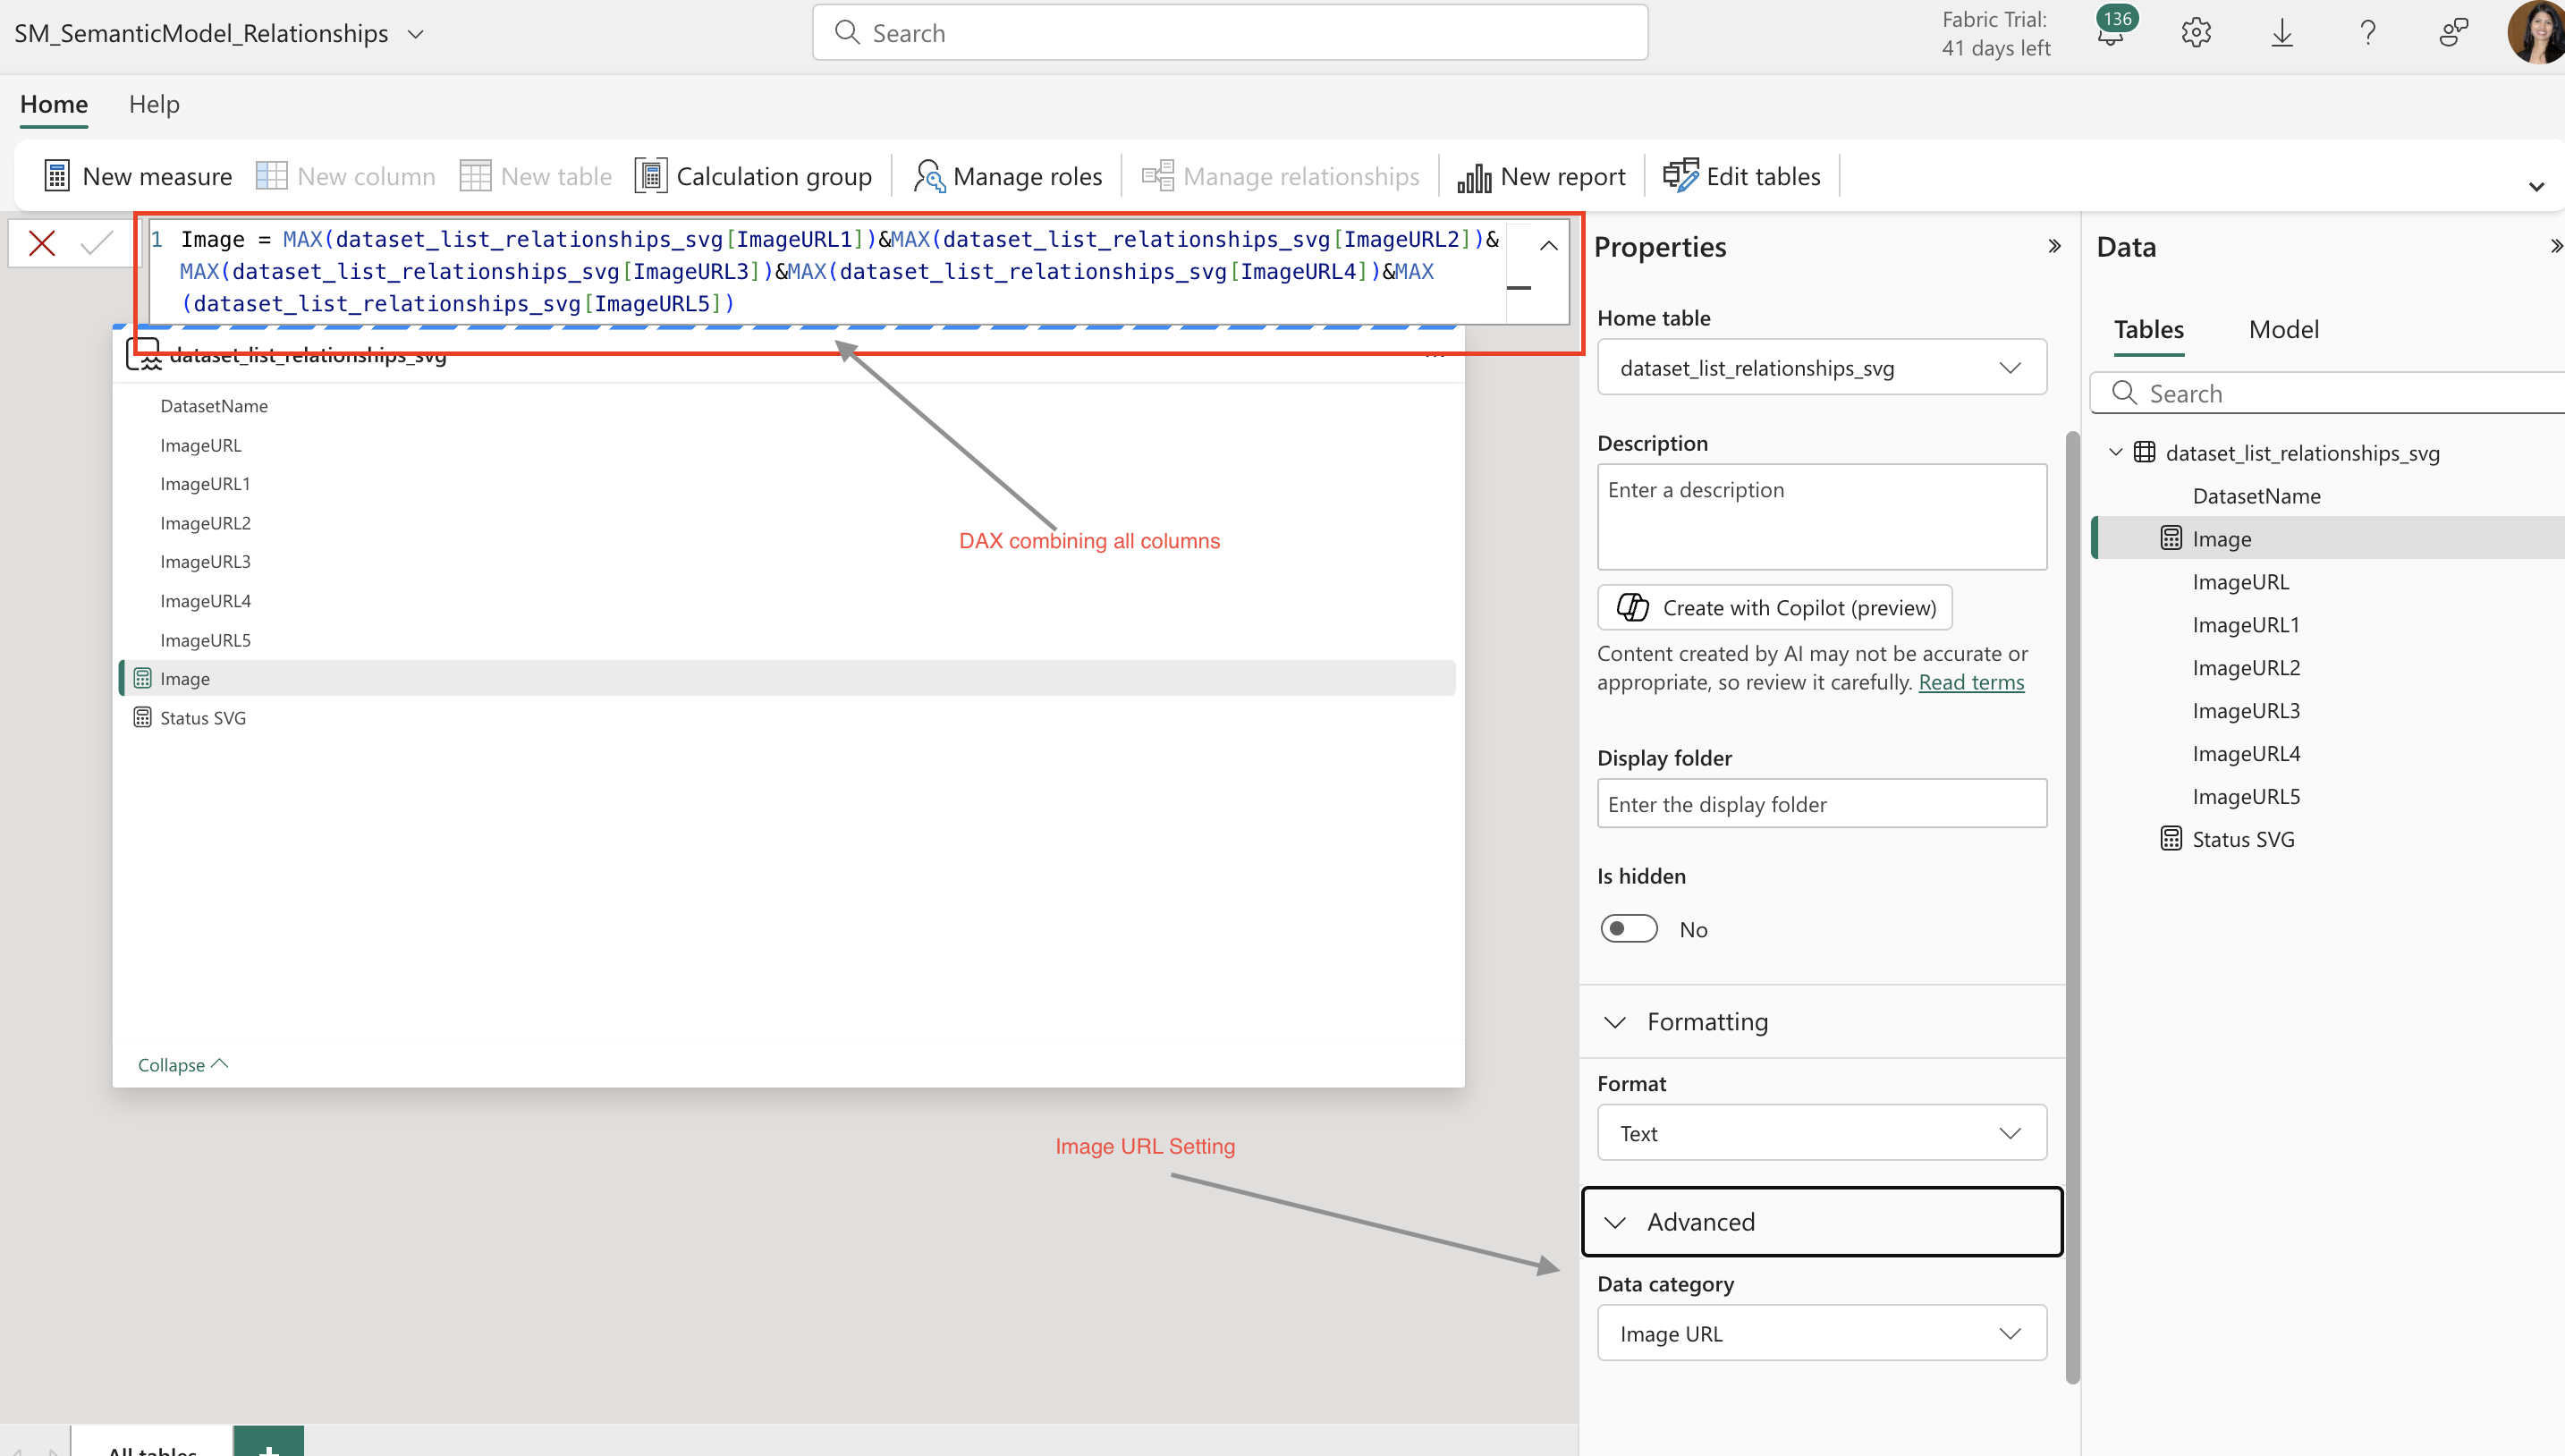

## How it will look in Power BI

This is a static image, but it could be useful to show with filtering.

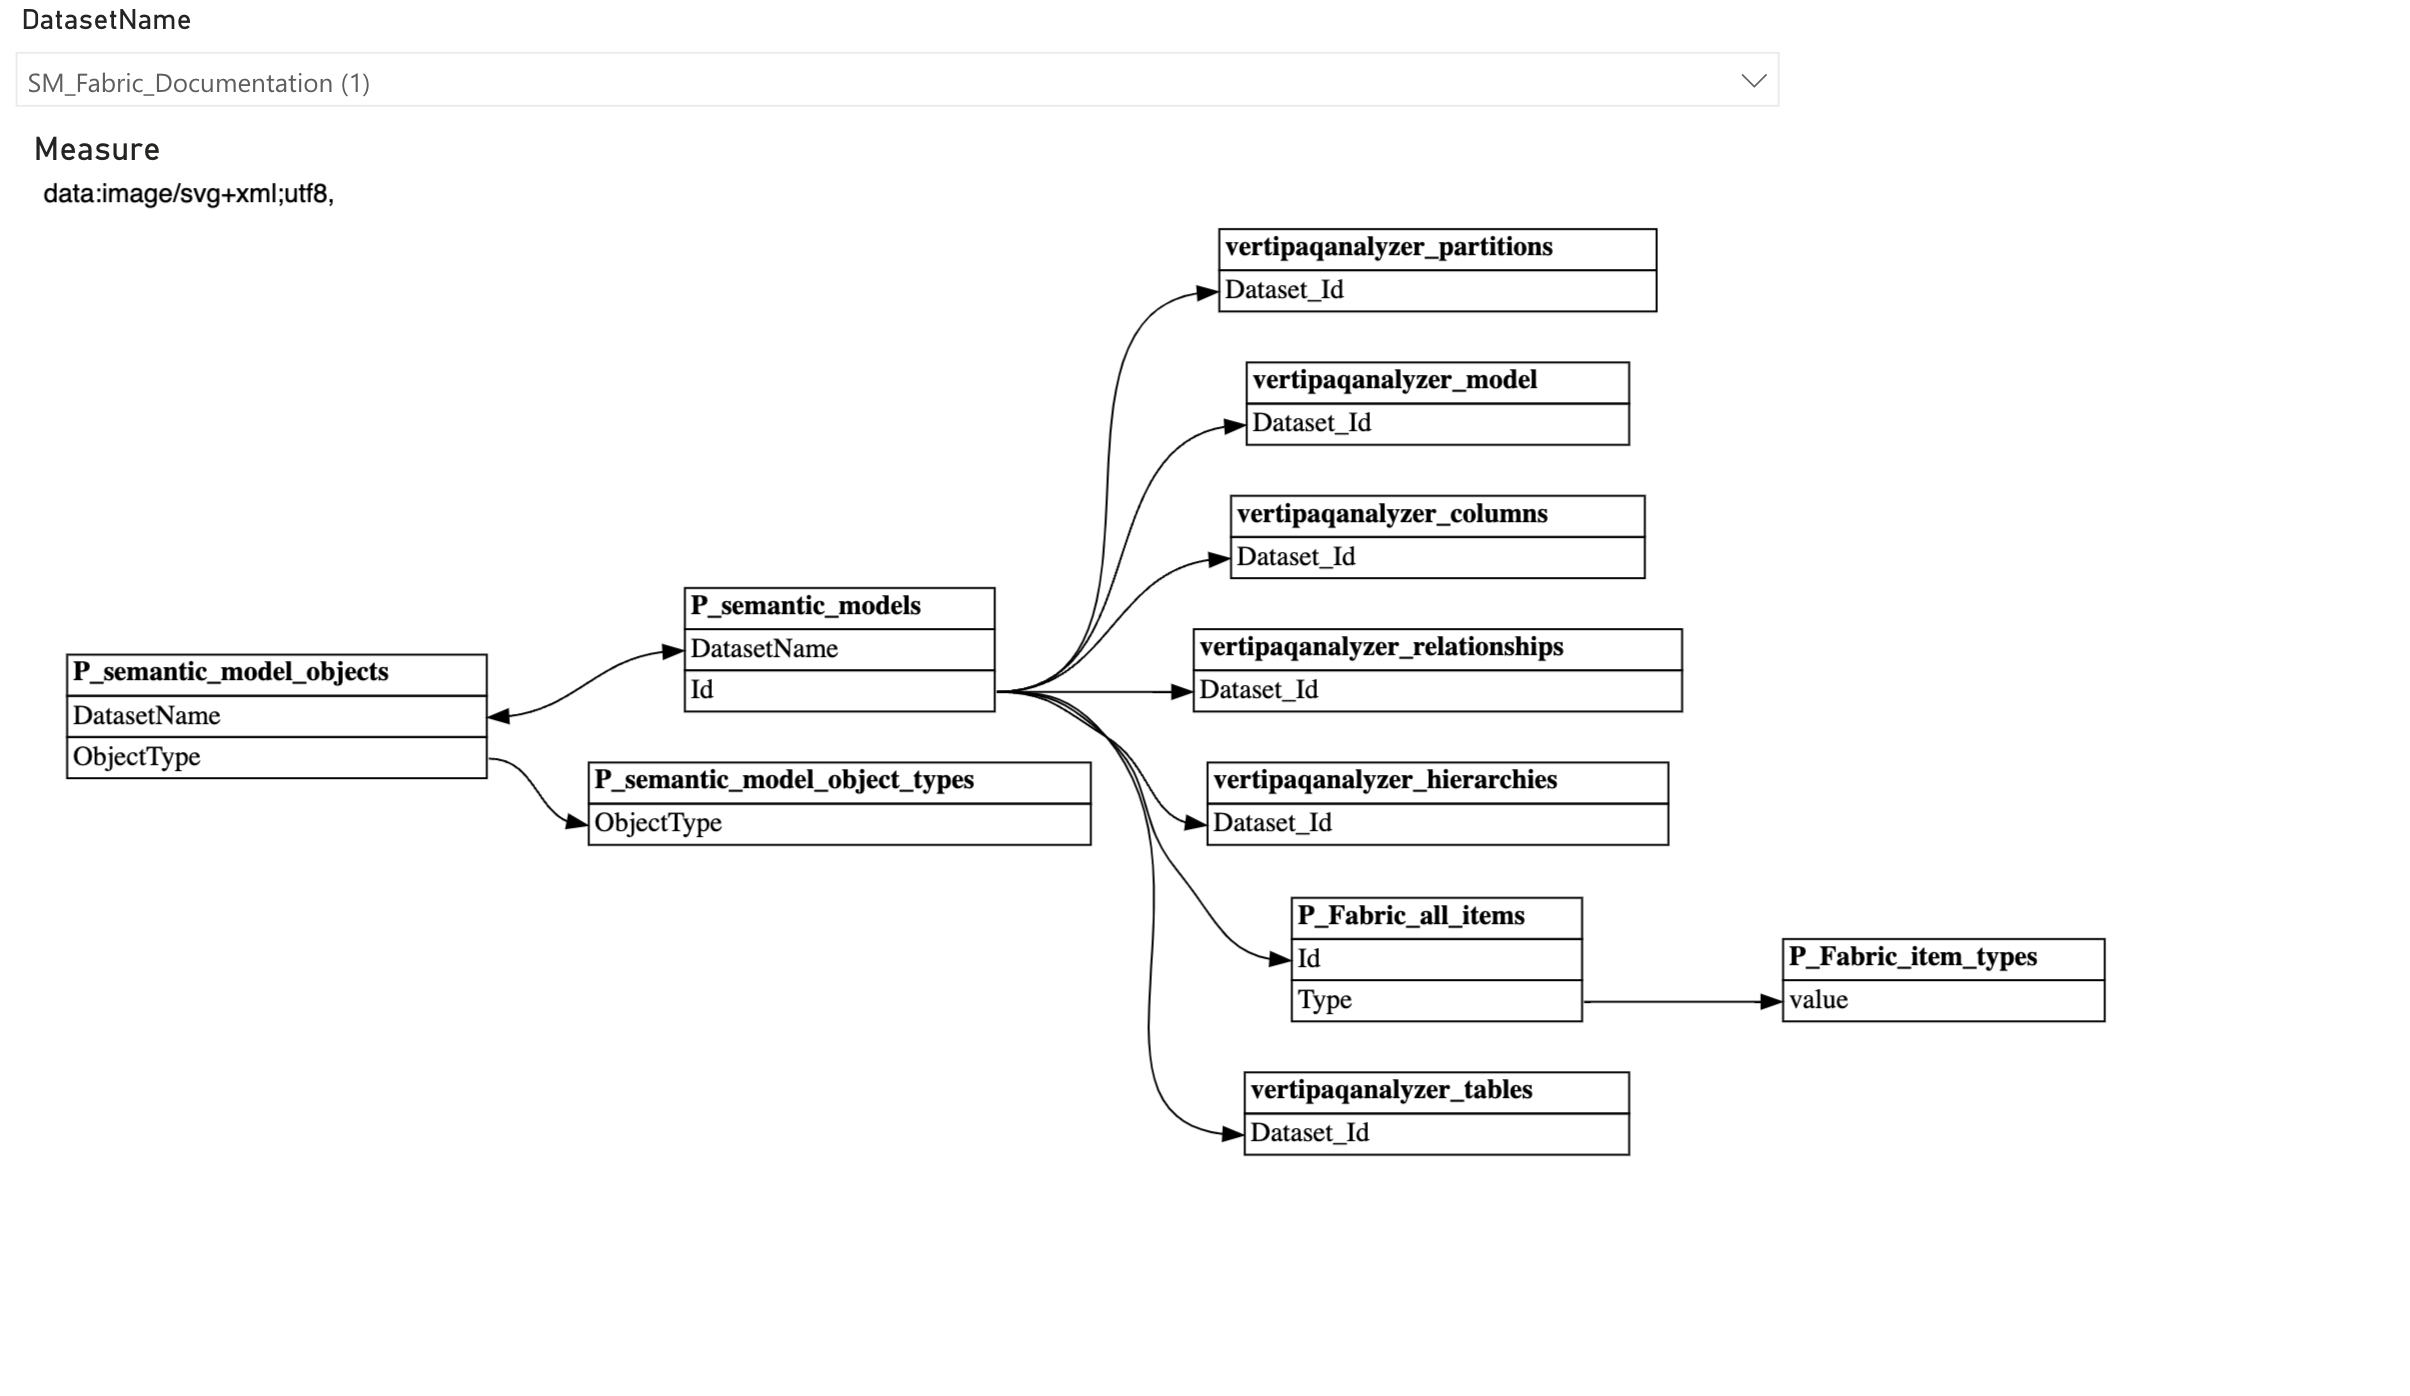

Testing code to try for one dataset

In [9]:
# ReleasePlan1 
Dataset='ReleasePlan1'
relationships = fabric.list_relationships(Dataset)
plot_relationship_metadata(Dataset)
relationships

if not relationships.empty:
    fig = plot_relationship_metadata(relationships)
    print(fig)
    # svg_text = fig.pipe(format='svg').decode('utf-8')
    # # Extract content between <svg> and </svg>
    # start_index = svg_text.find('<svg')
    # end_index = svg_text.find('</svg>') + len('</svg>')
    # svg_content = svg_text[start_index:end_index]
    # # print(svg_content)


StatementMeta(, 5c846428-91e0-41a7-870f-4d56547611a5, 17, Finished, Available, Finished)

AttributeError: 'str' object has no attribute 'to_dict'

And instead of using SVG, we can also work with base 64. SVG is much smaller than base64 though

In [ ]:
# import pandas as pd
# import graphviz
# import base64
# import matplotlib.pyplot as plt

# # Get the list of datasets
# datasets = fabric.list_datasets()
# dataset_base64_list = []

# # Convert the list to a DataFrame
# df = pd.DataFrame(datasets, columns=['Dataset Name'])

# # Iterate over each dataset name
# for dataset_name in df['Dataset Name']:
#     # Get the relationships of the current dataset
#     relationships = fabric.list_relationships(dataset_name)
#     # print(relationships)
    
#     # Check if relationships DataFrame is not empty
#     if not relationships.empty:
#         fig = plot_relationship_metadata(relationships)
#         print(fig)
#         # Encode the graph as a PNG in memory
#         buffer = fig.pipe(format='png')  
#         # Convert the buffer to a base64 string
#         base64_str = base64.b64encode(buffer).decode('utf-8')
#         # print(len(base64_str))
#         # print(dataset_name)
#         # Append the dataset name and base64 value to the list
#         dataset_base64_list.append((dataset_name, base64_str))
        
# # # Convert the list to a DataFrame for better visualization
# df = pd.DataFrame(dataset_base64_list, columns=['DatasetName', 'Base64Value'])
# df['ImageURL'] = 'data:image/jpeg;base64, '+ df['Base64Value']
# drop_cols = ['Base64Value']
# df.drop(drop_cols, axis=1, inplace=True)
# df = df[['DatasetName', 'ImageURL']]

# max_length = df['ImageURL'].str.len().max()
# # print(max_length)
# chunk_size = 30000
# num_columns = round((max_length / chunk_size) + 1)

# # print(num_columns)

# for i in range(num_columns): 
#     # Create a new column name 
#     # print(i)
#     col_name = f'ImageURL{i+1}'
#     # # print(col_name)
#     start, stop, step = i*chunk_size,(i+1)*chunk_size,1
#     df[col_name] = df['ImageURL'].str.slice(start,stop)
#     # # print(start)
#     # # print(stop) 

# # cnames = df.columns
# # print(cnames)

# spark_df=spark.createDataFrame(df)
# spark_df.write.format("delta").option("mergeSchema", "true").mode("overwrite").saveAsTable("Dataset_list_relationships_base64")


StatementMeta(, , , Cancelled, , Cancelled)